In [1]:
pip install seaborn

     |████████████████████████████████| 285 kB 4.2 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


#  The Spark Foundation

## Kunal Patle

## Task 2 - Predection Using Unsupervised ML - Clustering 

## Data 

Data can be found here : https://bit.ly/3kXTdox.
Data is in tabular form and contains 6 columns which stores data about the iris flowers. 

### Importing the libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

### Load the iris dataset

In [3]:
iris_df=pd.read_csv('Iris.csv')
iris_df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris_df.shape # shows the size of the dataset

(150, 6)

In [5]:
iris_df.describe() # gives some useful stats for the datasets

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
iris_df.isnull().sum() # shows us no. of missing values present in each column

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [7]:
iris_df.dtypes # show us the data types of each column in the dataset.

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [8]:
iris_df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [9]:
mapping={"Iris-setosa":"Setosa",
        "Iris-versicolor":"Versicolor",
        "Iris-virginica":"Virginica"}

In [10]:
iris_df['Species']=iris_df['Species'].map(mapping)

### Plotting Different Graphs to Analyse the Data 

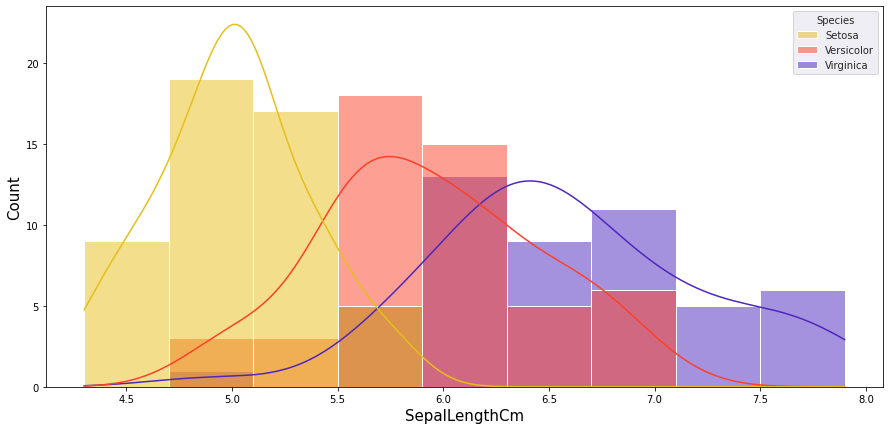

In [11]:
plt.subplots(figsize=(15,7))
sn.set_style("darkgrid")
plt.xlabel("SepalLengthCm",fontsize='15')
plt.ylabel("Count",fontsize='15')
sn.histplot(data=iris_df,x=iris_df["SepalLengthCm"],kde=True,hue='Species',palette='CMRmap_r');

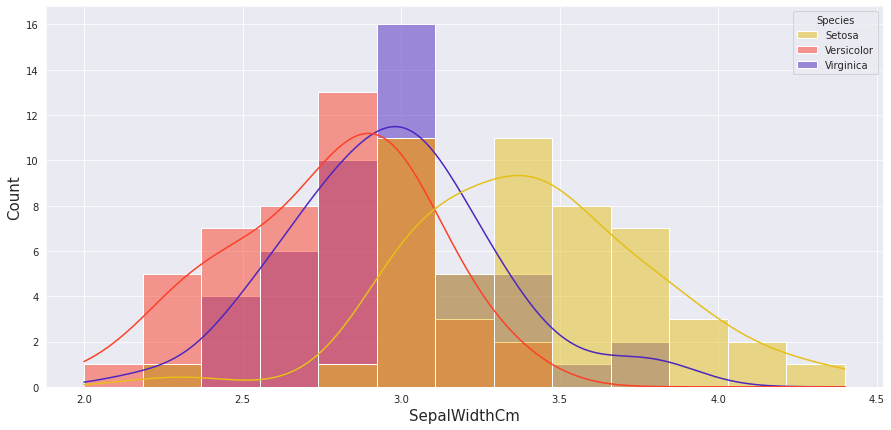

In [12]:
plt.figure(figsize=(15,7))
plt.xlabel("SepalWidthCm",fontsize='15')
plt.ylabel("Count",fontsize='15')
sn.histplot(data=iris_df,x=iris_df["SepalWidthCm"],kde=True,hue='Species',palette='CMRmap_r');

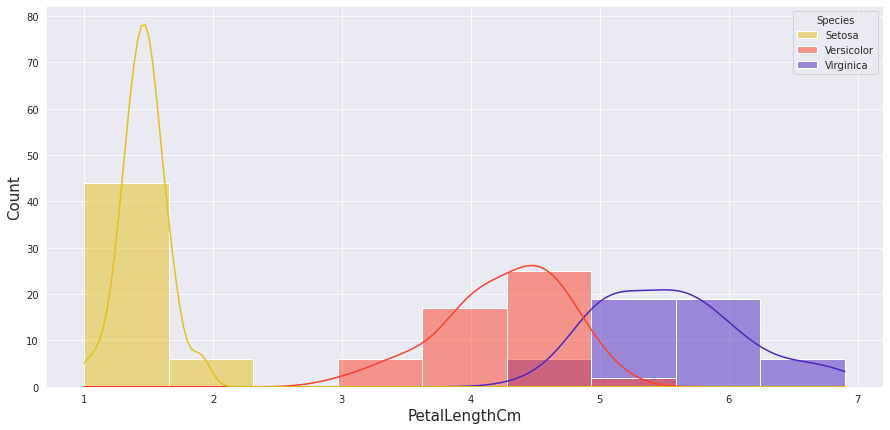

In [13]:
plt.figure(figsize=(15,7))
plt.xlabel("PetalLengthCm",fontsize='15')
plt.ylabel("Count",fontsize='15')
sn.histplot(data=iris_df,x=iris_df["PetalLengthCm"],kde=True,hue='Species',palette='CMRmap_r');

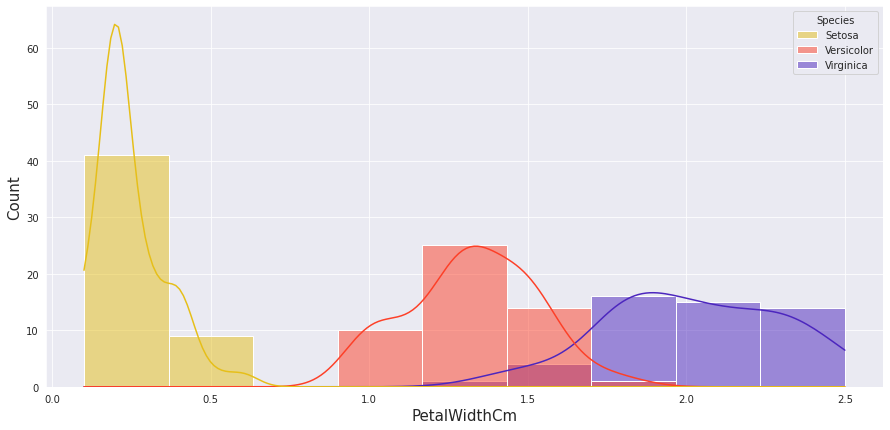

In [14]:
plt.figure(figsize=(15,7))
plt.xlabel("PetalWidthCm",fontsize='15')
plt.ylabel("Count",fontsize='15')
sn.histplot(data=iris_df,x=iris_df["PetalWidthCm"],kde=True,hue='Species',palette='CMRmap_r');

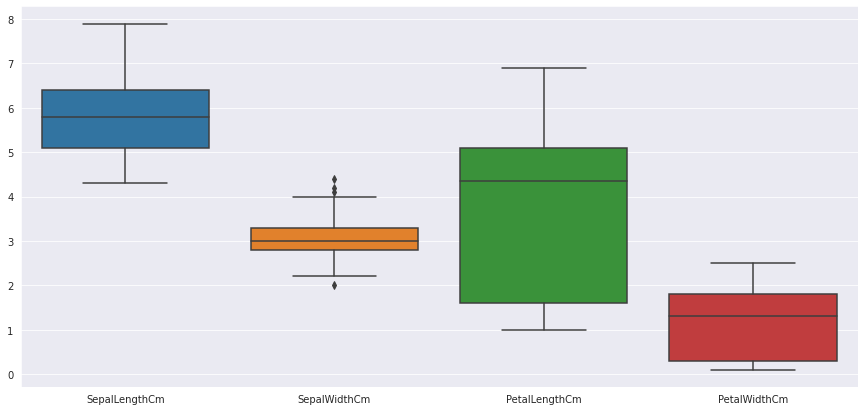

In [15]:
iris=iris_df[["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]]
plt.figure(figsize=(15,7))
sn.boxplot(data=iris);

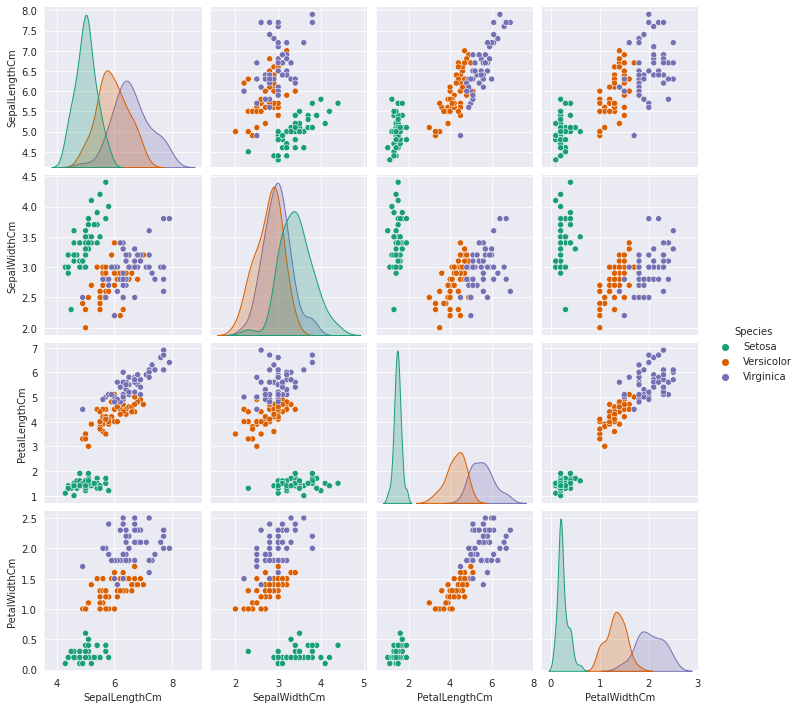

In [16]:
sn.pairplot(iris_df.iloc[:,1:6],hue='Species',palette='Dark2');

### Finding the Required Number of Clusters

In [55]:
x=iris_df.iloc[:,[0,1,2,3,4]].values

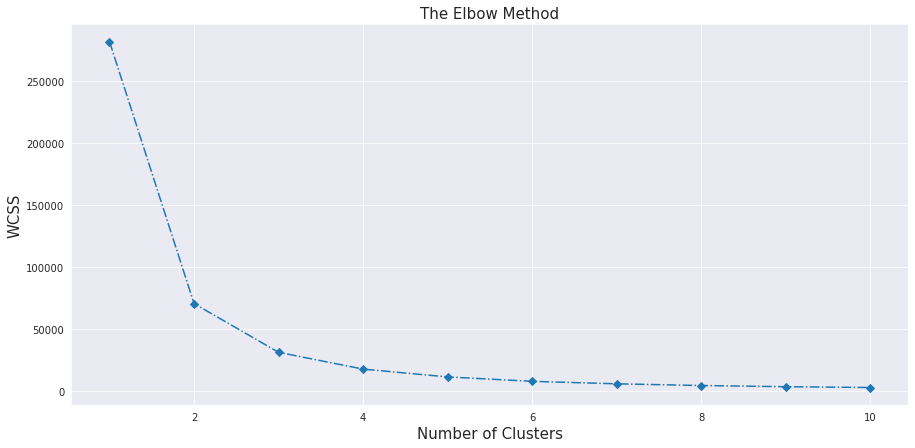

In [56]:
from sklearn.cluster import KMeans
wcss=[]

for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
# Plotting the results onto a line graph
plt.figure(figsize=(15,7))
plt.plot(range(1,11),wcss,'-.',marker='D')
plt.title('The Elbow Method',fontsize='15')
plt.xlabel('Number of Clusters', fontsize='15')
plt.ylabel('WCSS',fontsize='15')
plt.show()

Now by observing the graph we can predict that 3 is the optimum no. of clusters.

In [63]:
kmeans= KMeans(n_clusters=3, init= 'k-means++',max_iter = 300, n_init = 10, random_state = 0)
pred=kmeans.fit_predict(x)
df=pd.DataFrame(x)
df['cluster']=pred
df['cluster'].value_counts()

2    50
1    50
0    50
Name: cluster, dtype: int64

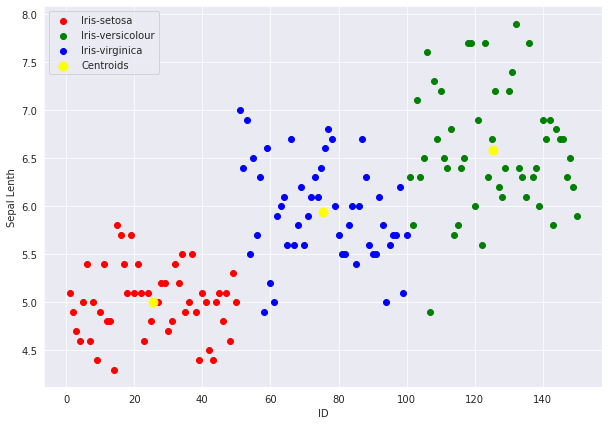

In [58]:
# ID Vs Sepal Length
plt.figure(figsize=(10,7))
plt.scatter(x[pred==0,0],x[pred==0,1],c='red',label='Iris-setosa')
plt.scatter(x[pred==1,0],x[pred==1,1],c='green',label='Iris-versicolour')
plt.scatter(x[pred==2,0],x[pred==2,1],c='blue',label='Iris-virginica')
plt.xlabel('ID')
plt.ylabel('Sepal Lenth')

# Centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=80,c='yellow',label='Centroids')

plt.legend();

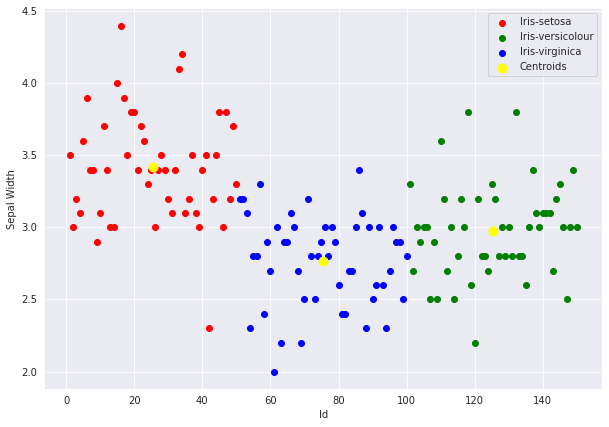

In [60]:
# Id Vs Sepal Width
plt.figure(figsize=(10,7))
plt.scatter(x[pred==0,0],x[pred==0,2],c='red',label='Iris-setosa')
plt.scatter(x[pred==1,0],x[pred==1,2],c='green',label='Iris-versicolour')
plt.scatter(x[pred==2,0],x[pred==2,2],c='blue',label='Iris-virginica')
plt.xlabel('Id')
plt.ylabel('Sepal Width')

# Centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,2],s=80,c='yellow',label='Centroids')

plt.legend();

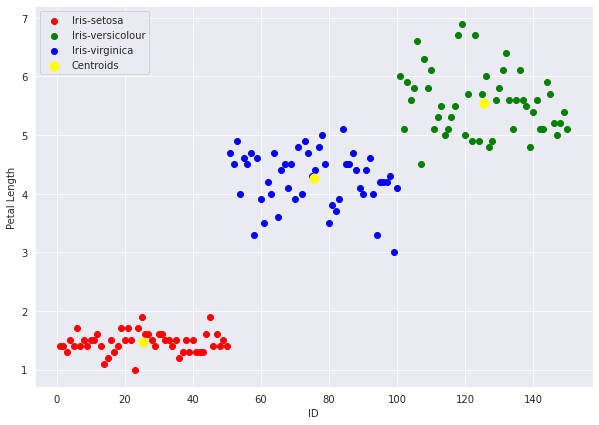

In [64]:
# Id Vs Petal Length
plt.figure(figsize=(10,7))
plt.scatter(x[pred==0,0],x[pred==0,3],c='red',label='Iris-setosa')
plt.scatter(x[pred==1,0],x[pred==1,3],c='green',label='Iris-versicolour')
plt.scatter(x[pred==2,0],x[pred==2,3],c='blue',label='Iris-virginica')
plt.xlabel('ID')
plt.ylabel('Petal Length')

# Centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,3],s=80,c='yellow',label='Centroids')

plt.legend();

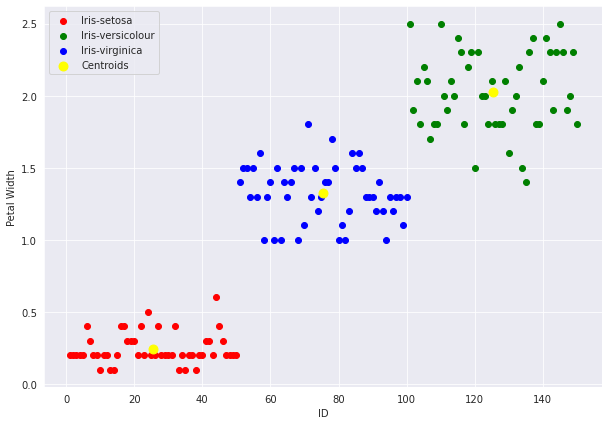

In [65]:
# Id Vs Petal Width
plt.figure(figsize=(10,7))
plt.scatter(x[pred==0,0],x[pred==0,4],c='red',label='Iris-setosa')
plt.scatter(x[pred==1,0],x[pred==1,4],c='green',label='Iris-versicolour')
plt.scatter(x[pred==2,0],x[pred==2,4],c='blue',label='Iris-virginica')
plt.xlabel('ID')
plt.ylabel('Petal Width')

# Centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,4],s=80,c='yellow',label='Centroids')

plt.legend();